In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
import keras.backend as K
from scipy.stats import pearsonr, spearmanr, ttest_1samp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=15
import keras.metrics

Using Theano backend.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_zu0iyfnd.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
Preallocating 10619/11178 Mb (0.950000) on cuda
Mapped name None to device cuda: GeForce GTX 1080 Ti (0000:1B:00.0)


In [2]:
neun_model = load_model('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/model_7_gc_matched_neg.hdf5', compile=False)

In [3]:
X_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/chr4_summit_centered_validation_set_X_gc_matched_neg.npy')
Y_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/chr4_summit_centered_validation_set_Y_gc_matched_neg.npy')

In [4]:
model_pred_valid = neun_model.predict(X_valid)

Validation: (array([0.79473189]), array([0.]))
Validation: SpearmanrResult(correlation=0.8359445605969337, pvalue=0.0)


/home/eramamur/bin/miniconda3/envs/gpu_keras_theano/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


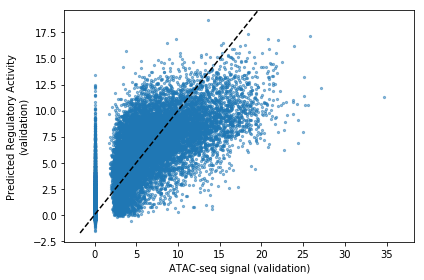

In [5]:
plt.scatter(Y_valid, model_pred_valid, s=5, alpha=0.5, rasterized=True)
plt.xlabel("ATAC-seq signal (validation)")
plt.ylabel("Predicted Regulatory Activity\n(validation)")


x_limits = plt.xlim()
y_limits = plt.ylim()
x_linspace = np.linspace(x_limits[0],x_limits[1],num=50)
y_linspace = x_linspace
plt.plot(x_linspace, x_linspace, c='k', linestyle='--')
plt.ylim(y_limits)
plt.savefig("neun_gc_matched_model_held_out_chr_prediction.svg")

print("Validation:",pearsonr(Y_valid, model_pred_valid))
print("Validation:",spearmanr(Y_valid, model_pred_valid))

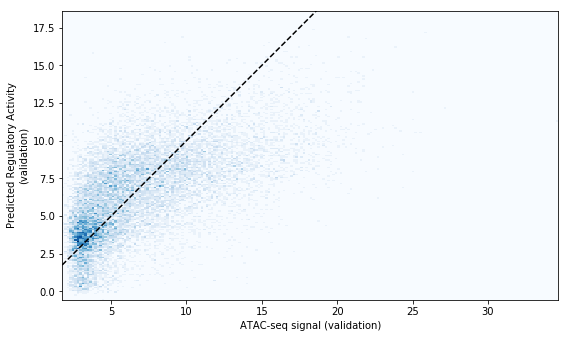

In [6]:
plt.figure(figsize=(8,8))

heatmap, xedges, yedges = np.histogram2d(Y_valid[~(Y_valid==0)].flatten(),
                                         model_pred_valid[~(Y_valid==0)].flatten(),
                                         bins=200
                                        )

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T,
           extent=extent,
           origin='lower',
           cmap='Blues'
          )

x_limits = plt.xlim()
y_limits = plt.ylim()
x_linspace = np.linspace(x_limits[0],x_limits[1],num=50)
y_linspace = x_linspace
plt.plot(x_linspace, x_linspace, c='k', linestyle='--')
plt.ylim(y_limits)
plt.xlabel("ATAC-seq signal (validation)")
plt.ylabel("Predicted Regulatory Activity\n(validation)")
plt.show()

In [7]:
(Y_valid==0).sum()

7770

(array([2.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 7.000e+00,
        2.400e+01, 9.100e+01, 2.740e+02, 7.050e+02, 1.294e+03, 1.261e+03,
        8.550e+02, 4.850e+02, 3.120e+02, 2.810e+02, 2.080e+02, 1.760e+02,
        1.280e+02, 1.040e+02, 1.060e+02, 9.400e+01, 9.800e+01, 8.500e+01,
        8.600e+01, 5.700e+01, 7.900e+01, 6.400e+01, 5.800e+01, 6.100e+01,
        5.700e+01, 5.400e+01, 4.600e+01, 4.300e+01, 4.600e+01, 3.900e+01,
        3.700e+01, 4.100e+01, 2.900e+01, 2.000e+01, 2.300e+01, 3.200e+01,
        1.800e+01, 1.800e+01, 1.800e+01, 1.400e+01, 1.800e+01, 2.300e+01,
        1.400e+01, 1.700e+01, 8.000e+00, 2.100e+01, 9.000e+00, 9.000e+00,
        1.600e+01, 7.000e+00, 5.000e+00, 3.000e+00, 1.100e+01, 9.000e+00,
        4.000e+00, 6.000e+00, 3.000e+00, 5.000e+00, 1.000e+00, 5.000e+00,
        1.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+0

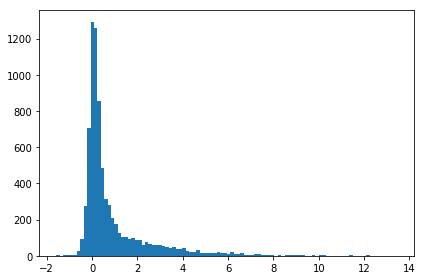

In [8]:
plt.hist(model_pred_valid[Y_valid==0], bins=100)

In [9]:
X_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/chrs_training_summit_centered_training_set_X_gc_matched_neg.npy')
Y_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/chrs_training_summit_centered_training_set_Y_gc_matched_neg.npy')

In [10]:
model_pred_train = neun_model.predict(X_train)

Validation: (array([0.64743581]), array([0.]))
Validation: SpearmanrResult(correlation=0.6694366228798229, pvalue=0.0)


/home/eramamur/bin/miniconda3/envs/gpu_keras_theano/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


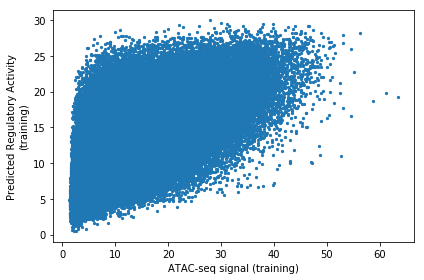

In [14]:
plt.scatter(Y_train, model_pred_train, s=5, alpha=0.5)
plt.xlabel("ATAC-seq signal (training)")
plt.ylabel("Predicted Regulatory Activity\n(training)")


plt.savefig("neun_model_training_chrs_prediction.png")

print("Validation:",pearsonr(Y_train, model_pred_train))
print("Validation:",spearmanr(Y_train, model_pred_train))

In [12]:
ref_bin1 = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_human_monocyte_brain/differential_peaks_models/snps_overlapping_bin1_rough_region_reference.npy")
alt_bin1 = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_human_monocyte_brain/differential_peaks_models/snps_overlapping_bin1_rough_region_alternate.npy")


In [13]:
ref_scores = microglia_model.predict(ref_bin1)
alt_scores = microglia_model.predict(alt_bin1)